# SMS Spam Detection with Machine Learning
Description of the project:
    To detect wether the SMS is spam or ham.

Importing Libraries which are useful for this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset and reading

In [10]:
data = pd.read_csv("C:\\Users\\satya\\Downloads\\spam.csv", encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Dropping unwanted columns

In [12]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 'columns', inplace = True)

In [13]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Checking the no of rows and columns in dataset

In [16]:
print('Rows: ',data.shape[0],'\nColumns: ',data.shape[1])

Rows:  5589 
Columns:  2


Checking the Information of dataset

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5589 entries, 0 to 5588
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5589 non-null   object
 1   v2      5589 non-null   object
dtypes: object(2)
memory usage: 87.5+ KB


Checking the null values

In [18]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

There are no null values in this dataset

Replacing column names

In [22]:
data.rename(columns = {'v1':'Spam_Type', 'v2':'SMS_Text'}, inplace = True)

In [24]:
data.head()

,Spam_Type,SMS_Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
data.SMS_Text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

Counting the values of spam type

In [27]:
data['Spam_Type'].value_counts()

ham     4840
spam     749
Name: Spam_Type, dtype: int64

Label Encoding Spam_Type column manually by using map function

In [30]:
data['Spam_Type'] = data['Spam_Type'].map({'spam':1, 'ham':0})

In [31]:
data.head()

,Spam_Type,SMS_Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Creating a Count plot using seaborn library

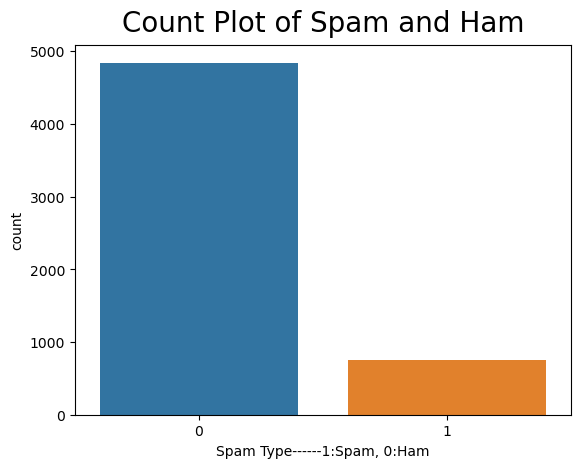

In [34]:
sns.countplot(x = data['Spam_Type'])
plt.title("Count Plot of Spam and Ham", fontsize = 20, pad = 10)
plt.xlabel("Spam Type------1:Spam, 0:Ham")
plt.show()

Checking duplicate values

In [36]:
data.duplicated().sum()

420

Dropping all duplicate values

In [41]:
data.drop_duplicates(inplace = True)

After dropping dupplicates again checking the size of data set and value counts

In [42]:
print('Rows: ',data.shape[0],'\nColumns: ',data.shape[1])
print(data['Spam_Type'].value_counts())

Rows:  5169 
Columns:  2
0    4516
1     653
Name: Spam_Type, dtype: int64


Creating Dependent features and Individual Features

In [43]:
X = data['SMS_Text'].values
y = data['Spam_Type'].values

# Training, Testing, Splitting the X, y values

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

Checking all the sizes of the train and test 

In [46]:
print("X_train size:",X_train.shape,'\nX_test size:',X_test.shape,'\ny_train size:',y_train.shape,'\ny_test size:',y_test.shape)

X_train size: (4135,) 
X_test size: (1034,) 
y_train size: (4135,) 
y_test size: (1034,)


# Preprocessing

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# Training using Machine Learning Model

In [76]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# Creating the PipeLine

In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

pipe = make_pipeline(cv, mnb)
pipe.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

Creating prediction for X_train and X_test

In [78]:
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# Finding the accuracy score for Testing and Training

In [86]:
print("Accuracy score for Training:",accuracy_score(y_train, y_pred_train)*100,'%')
print("Accuracy score for Testing:",accuracy_score(y_test, y_pred_test)*100,'%')

Accuracy score for Training: 99.29866989117292 %
Accuracy score for Testing: 98.45261121856866 %


# Plotting ROC AUC Curve for Training and Testing

In [87]:
from sklearn.metrics import roc_auc_score, roc_curve

print("ROC AUC score for Training:",roc_auc_score(y_train, y_pred_train)*100,'%')
print("ROC AUC score for Testing:",roc_auc_score(y_test, y_pred_test)*100,'%')

ROC AUC score for Training: 98.01721825886392 %
ROC AUC score for Testing: 95.4289596273292 %


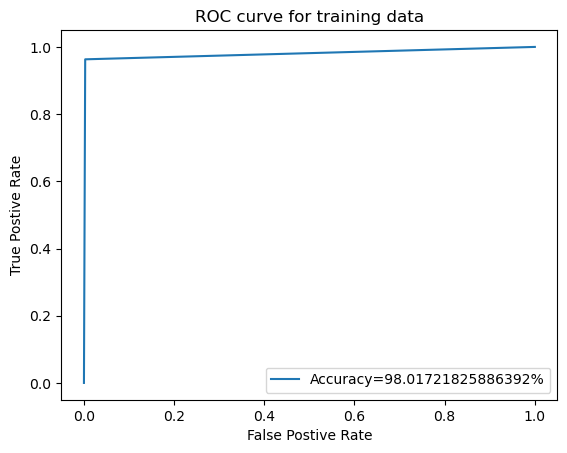

In [88]:
fpr, tpr, threshold = roc_curve(y_train, y_pred_train)
plt.plot(fpr, tpr, label = 'Accuracy='+str(roc_auc_score(y_train, y_pred_train)*100)+'%')
plt.title("ROC curve for training data")
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.legend()
plt.show()

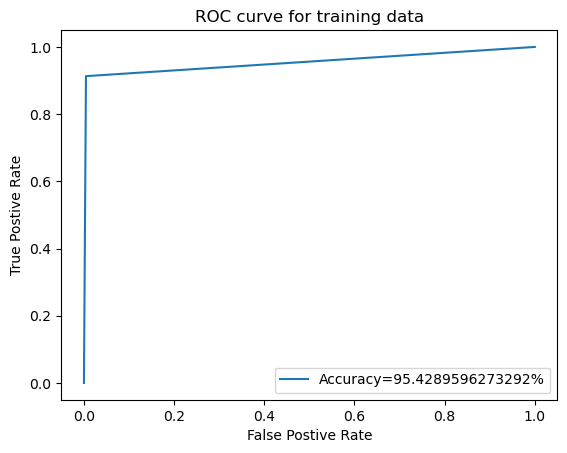

In [89]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr, label = 'Accuracy='+str(roc_auc_score(y_test, y_pred_test)*100)+'%')
plt.title("ROC curve for training data")
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.legend()
plt.show()

In [95]:
from sklearn.metrics import confusion_matrix, classification_report

# Creating confusion matrix for training data

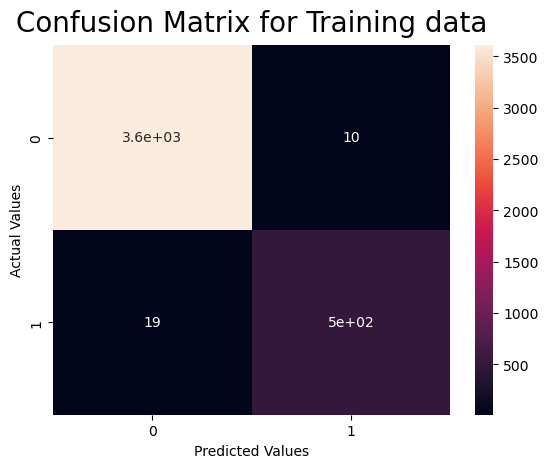

In [97]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot = True)
plt.title("Confusion Matrix for Training data", fontsize = 20, pad = 10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Creating confusion matrix for Testing data

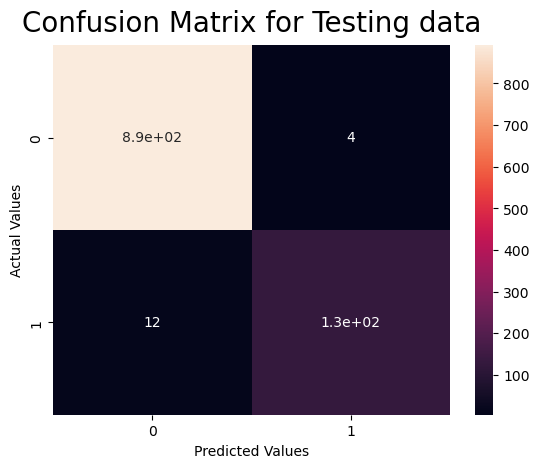

In [99]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot = True)
plt.title("Confusion Matrix for Testing data", fontsize = 20, pad = 10)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

# Classification report for Training data

In [110]:
train_report = classification_report(y_train, y_pred_train, output_dict=True)
pd.DataFrame(train_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.994764,0.980237,0.992987,0.987501,0.992955
recall,0.997238,0.963107,0.992987,0.980172,0.992987
f1-score,0.995999,0.971596,0.992987,0.983798,0.992960
support,3620.000000,515.000000,0.992987,4135.000000,4135.000000


# Classification report for Testing data

In [111]:
test_report = classification_report(y_test, y_pred_test, output_dict=True)
pd.DataFrame(test_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.986726,0.969231,0.984526,0.977978,0.984391
recall,0.995536,0.913043,0.984526,0.954290,0.984526
f1-score,0.991111,0.940299,0.984526,0.965705,0.984330
support,896.000000,138.000000,0.984526,1034.000000,1034.000000


# Predicting the data and testing the results

In [120]:
sms = 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
pipe.predict([sms])[0]

0

# Dumping the model to pickle file

In [121]:
import pickle
with open("sms_spam_or_ham.pkl", 'wb')as f:
    pickle.dump(pipe, f)